# Edge Index Creation
This notebook contains the code to create the edge indices using K Nearest Neighbors for various K

In [1]:
cd ..

/home/jovyan/work/SensoriumDecoding


In [2]:
# Imports
import numpy as np
from scipy.spatial import distance
import torch
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
coordinatesA = np.load('data/sensorium/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/meta/neurons/cell_motor_coordinates.npy')
coordinatesB = np.load('data/sensorium/static22846-10-16-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/meta/neurons/cell_motor_coordinates.npy')
coordinatesC = np.load('data/sensorium/static23343-5-17-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/meta/neurons/cell_motor_coordinates.npy')
coordinatesD = np.load('data/sensorium/static23656-14-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/meta/neurons/cell_motor_coordinates.npy')
coordinatesE = np.load('data/sensorium/static23964-4-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/meta/neurons/cell_motor_coordinates.npy')

In [4]:
def create_edge_index(coordinates, k):
    # Compute 3d pairwise distances between all neurons
    pairwise_distances = distance.squareform(distance.pdist(coordinates))

    # Find the k nearest neighbors for each neuron
    nearest_neighbors = np.argsort(pairwise_distances, axis=1)[:, 1:k+1]

    # Create an edge index based on the nearest neighbors
    edge_index = []
    for i in range(coordinates.shape[0]):
        for j in nearest_neighbors[i]:
            edge_index.append((i, j))

    return torch.tensor(edge_index)

In [10]:
output_dir = "data/sensorium/edges"
ks = [3, 10, 30, 100, 300, 600, 800, 1000, 1500]
for k in ks:
    k_dir = os.path.join(output_dir, f"k_{k}")
    os.makedirs(k_dir, exist_ok=True)
    for mouse_id, coordinates in zip(["A", "B", "C", "D", "E"], [coordinatesA, coordinatesB, coordinatesC, coordinatesD, coordinatesE]):
        edge_index = create_edge_index(coordinates, k)
        torch.save(edge_index, os.path.join(k_dir, f"mouse_{mouse_id}_edge_index.pt"))

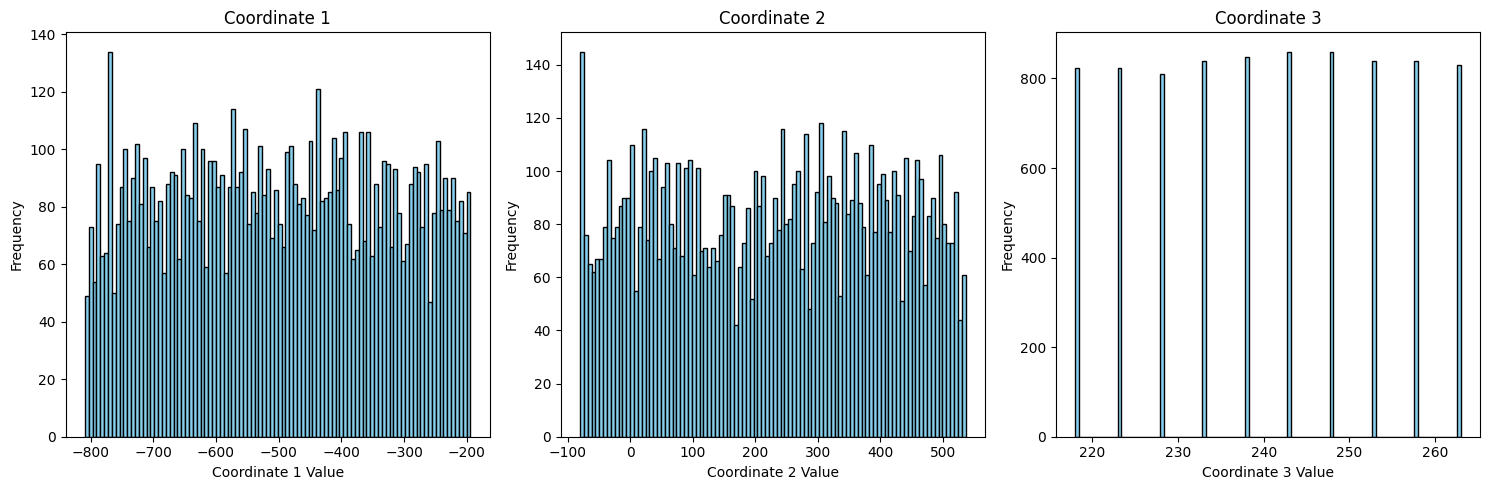

In [29]:
def plot_coordinate_distribution(coordinates):
    num_dimensions = coordinates.shape[1]
    fig, axs = plt.subplots(1, num_dimensions, figsize=(15, 5))  # Create subplots
    
    for i in range(num_dimensions):
        axs[i].hist(coordinates[:, i], bins=100, color='skyblue', edgecolor='black')  # Plot histogram
        axs[i].set_title(f'Coordinate {i+1}')  # Set title
        axs[i].set_xlabel(f'Coordinate {i+1} Value')  # Set x-axis label
        axs[i].set_ylabel('Frequency')  # Set y-axis label
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage:
plot_coordinate_distribution(coordinates)

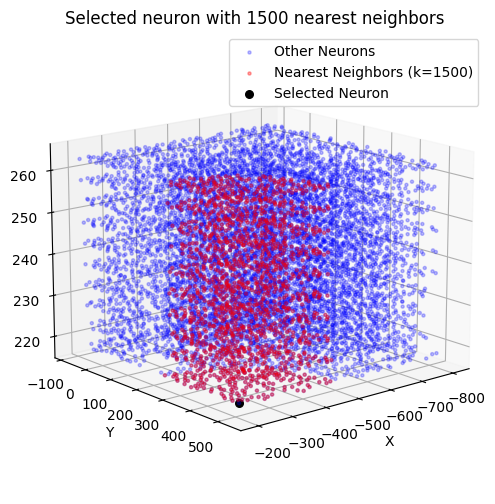

In [115]:
def plot_neuron_neighbors(coordinates, k, neuron_index):
    # Compute pairwise distances between all neurons
    pairwise_distances = np.linalg.norm(coordinates - coordinates[neuron_index], axis=1)

    # Get indices of k nearest neighbors
    nearest_neighbors = np.argsort(pairwise_distances)[1:k+1]

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot all neurons in blue (smaller dots)
    ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c='blue', label='Other Neurons', s=5, alpha=0.25)

    # Plot k nearest neighbors of the specified neuron in red
    ax.scatter(coordinates[nearest_neighbors, 0], coordinates[nearest_neighbors, 1],
               coordinates[nearest_neighbors, 2], c='red', label=f'Nearest Neighbors (k={k})', s=5, alpha=0.35)

    # Highlight the specified neuron in black
    ax.scatter(coordinates[neuron_index, 0], coordinates[neuron_index, 1],
               coordinates[neuron_index, 2], c='black', s=30, label='Selected Neuron', alpha=1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Selected neuron with {k} nearest neighbors')
    ax.legend()

    # Enable interactivity
    ax.view_init(elev=15, azim=50)
    plt.show()
plot_neuron_neighbors(coordinatesA, 1500, 7506)